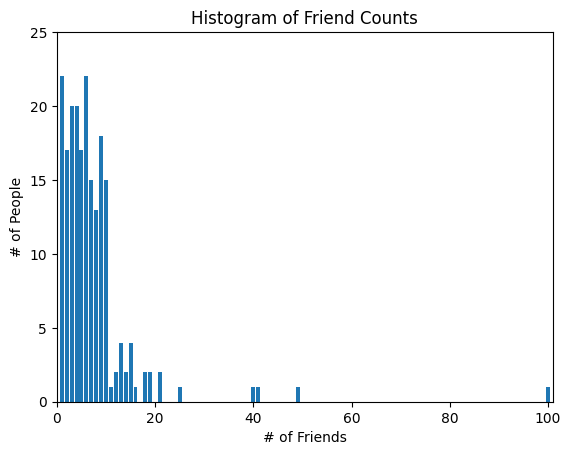

In [3]:
from collections import Counter
import matplotlib.pyplot as plt

num_friends = [100.0,49,41,40,25,21,21,19,19,18,18,16,15,15,15,15,14,14,13,13,13,13,12,12,11,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,8,8,8,8,8,8,8,8,8,8,8,8,8,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]

friends_counter = Counter(num_friends)
# Values cap at 100
xs = range(101) 
ys = [friends_counter[x] for x in xs]
plt.bar(xs, ys)
plt.axis([0, 101, 0, 25])
plt.title("Histogram of Friend Counts")
plt.xlabel("# of Friends")
plt.ylabel("# of People");

## Some values about the data

In [ ]:
shape = len(num_friends)
print("# of Observations: ", shape)

largest_value = max(num_friends)
print("Largest Value: ", largest_value)

smallest_value = min(num_friends)
print("Smallest Value: ", smallest_value)

sorted_values = sorted(num_friends)
print("Largest Value: ", sorted_values[0])
print("Smallest Value: ", sorted_values[-1])
print("Second Smallest Value: ", sorted_values[-2])


## Central Tendencies

In [ ]:
import math
from alglin import sum_of_squares, dot


def mean(xs: list[float]) -> float:
    """ Return mean (or average) of the data"""
    return sum(xs) / len(xs)

def _median_odd(xs: list[float]) -> float:
    return sorted(xs)[len(xs) // 2]

def _median_even(xs: list[float]) -> float:
    sortedx = sorted(xs)
    midpoint = len(xs) // 2
    return (sortedx[midpoint - 1] + sortedx[midpoint]) / 2

def median(v: list[float]) -> float:
    """ Find the middle-most value of a Vector """
    return _median_even(v) if len(v) % 2 == 0 else _median_odd(v)

def quantile(xs: list[float], p: float) -> float:
    """ Gives the p-percentile of a Vector"""
    p_idx = int(p * len(xs))
    return sorted(xs)[p_idx]

def mode(x: list[float]) -> list[float]:
    """ Return the mode (most common value within a dataset) """
    counter = Counter(x)
    maxc = max(counter.values())
    return [x_i for x_i, count in counter.items() if count == maxc]

def data_range(xs: list[float]) -> float:
    return max(xs) - min(xs)

def de_mean(xs: list[float]) -> list[float]:
    """ Translate xd by subtracting its mean (so the result has mean 0) """
    x_bar = mean(xs)
    return [x - x_bar for x in xs]

def variance(xs: list[float]) -> float:
    """Almost the average squared deviation from the mean"""
    assert len(xs) >= 2, "Variance requires >= 2 elements"

    n = len(xs)
    deviations = de_mean(xs)
    return sum_of_squares(deviations) / (n - 1)

def standard_deviation(xd: list[float]) -> float:
    """ STD DEV is the square of variance """
    return math.sqrt(variance(xs))


def interquartile_range(xs: list[float]) -> float:
    """ Returns the difference between the 75% and 25% percentile """
    return quantile(xs, 0.75) - quantile(xs, 0.25)


def covariance(xs: list[float], ys: list[float]) -> float:
    assert len(xs) == len(ys), "Both lists must have the same number of elements"

    return dot(de_mean(xs), de_mean(ys)) / (len(xs) - 1)


def correlation(xs: list[float], ys: list[float]) -> float:
    




In [ ]:
daily_minutes = [1,68.77,51.25,52.08,38.36,44.54,57.13,51.4,41.42,31.22,34.76,54.01,38.79,47.59,49.1,27.66,41.03,36.73,48.65,28.12,46.62,35.57,32.98,35,26.07,23.77,39.73,40.57,31.65,31.21,36.32,20.45,21.93,26.02,27.34,23.49,46.94,30.5,33.8,24.23,21.4,27.94,32.24,40.57,25.07,19.42,22.39,18.42,46.96,23.72,26.41,26.97,36.76,40.32,35.02,29.47,30.2,31,38.11,38.18,36.31,21.03,30.86,36.07,28.66,29.08,37.28,15.28,24.17,22.31,30.17,25.53,19.85,35.37,44.6,17.23,13.47,26.33,35.02,32.09,24.81,19.33,28.77,24.26,31.98,25.73,24.86,16.28,34.51,15.23,39.72,40.8,26.06,35.76,34.76,16.13,44.04,18.03,19.65,32.62,35.59,39.43,14.18,35.24,40.13,41.82,35.45,36.07,43.67,24.61,20.9,21.9,18.79,27.61,27.21,26.61,29.77,20.59,27.53,13.82,33.2,25,33.1,36.65,18.63,14.87,22.2,36.81,25.53,24.62,26.25,18.21,28.08,19.42,29.79,32.8,35.99,28.32,27.79,35.88,29.06,36.28,14.1,36.63,37.49,26.9,18.58,38.48,24.48,18.95,33.55,14.24,29.04,32.51,25.63,22.22,19,32.73,15.16,13.9,27.2,32.01,29.27,33,13.74,20.42,27.32,18.23,35.35,28.48,9.08,24.62,20.12,35.26,19.92,31.02,16.49,12.16,30.7,31.22,34.65,13.13,27.51,33.2,31.57,14.1,33.42,17.44,10.12,24.42,9.82,23.39,30.93,15.03,21.67,31.09,33.29,22.61,26.89,23.48,8.38,27.81,32.35,23.84]

daily_hours = [dm / 60 for dm in daily_minutes]